# Homework 1
### 23/03/2022
### Federica Valeau, Tommaso Di Mario, Valeria Sepicacchi.
## Exercise 1: It's Prob-time (...again-.-)!
$$ f_{X,Z}(x, z) = \begin{cases}
  8 \cdot (x \cdot z) \quad for \quad  0<z<x<1, \\
       0 \quad otherwise.
\end{cases}
$$

### 1)
Our function, to be a legit joint pdf, has to satisfy two requirements:
- the pdf is always positive: this is always true since the support of both x and z is stricly positive
- the pdf integrates to one

$$ \int_{0}^{1}\int_{0}^{x}8 \cdot (x \cdot z) \quad dz\ dx = \int_{0}^{1}8 \cdot (x) \cdot \frac{z^2}{2}\Big|_{0}^{x} \; dx = \int_{0}^{1} 4 \cdot (x^3) \ dx = 4 \cdot \frac{x^4}{4}\Big|_{0}^{1} = 1 - 0 = 1
$$

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# function definition
def fxz(X,Y):
    Z = []
    for x in range(len(X)):
        Z.append([])
        for y in range(len(X[0])):
            if X[x][y] > Y[x][y]:
                Z[-1].append(8*X[x][y]*Y[x][y])
            else:
                # we check the bounds
                Z[-1].append(0)
    return Z
          
# Grid for plotting in the search space
x = np.linspace(0, 1,100)
z = np.linspace(0, 1,100)
X, Z = np.meshgrid(x, z)
Y = fxz(X,Z)


# plotting layout
fig = go.Figure(data=[go.Surface(x=X, y=Z, z = Y)])
fig.update_layout(title='Joint PDF', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_layout(scene = dict(
                    xaxis_title='X',
                    yaxis_title='Z',
                    zaxis_title='Y'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

To find the proportion of students who obtained a score greater than
0.5 in Statistics, we have to evaluate $P(Z>0.5)$. We computed this in two ways:
- using the joint probability 
$$
 \int_{1/2}^{1} \int_{z}^{1} 8 \cdot (x \cdot z) \; dx \ dz =
   \int_{1/2}^{1} 8 \cdot z \cdot \left[\frac{x^2}{2}\right]_{z}^{1} dz =
   \int_{1/2}^{1} 4z - 4z^3 dz = 
   \left[ 2z^2 - z^4\right]_{1/2}^1 = 
   2 - 1 - (\frac{1}{2} - \frac{1}{16}) = \frac{9}{16}
$$


- using the marginal probability (we found the marginal probability in this way) 
$$ \int_{z}^{1} 8 \cdot (x) \cdot (z) \; dx = 8 \cdot z \cdot \left [ \frac{x^2}{2} \right]_{z}^{1} = 8 \cdot z \cdot ( \frac{1}{2} - \frac{z^2}{2} ) = 4z - 4z^3 $$
The probability of being greater than 0.5 is 9/16

The probability that a randomly selected student will have a Stat-score exactly equal to 0.5 is 0, since the probability that a continuous random variable equals an exact value is always zero. We can confirm that by integrating the marginal probability from 0.5 to 0.5, the result will still be zero. 

## 2)
$
W = log(Z) $

We find the pdf of W using the marginal pdf $f_Z(z) = 4z - 4z^3$,
$$
F_W(w) = P(W\leq w) = P(log(Z) \leq w) = P(Z \leq e^w) = \int_{0}^{e^w} 4z - 4z^3 dz = 2z^2 - z^4 |_{0}^{e^w} = 2e^{2w} - e^{4w}
\\
f_W(w) =\frac{d}{dw}[F_W(w)] = \frac{d}{dw}[2e^{2w} - e^{4w}] = 4e^{2w} - 4e^{4w}
$$ 

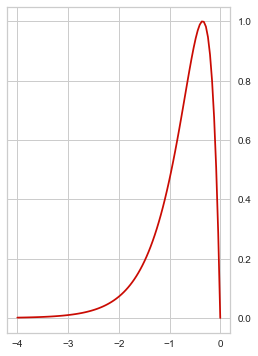

In [231]:
import matplotlib.pyplot as plt
import math
import numpy as np

# This is the plot of f(w)

# For this function we actually plotted a zoomed in version in order to show the function
x = np.linspace(-4,-0.00001,100)

# the function
y = (4*math.e**(2*x))*(1-math.e**(2*x))

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(111)
ax.yaxis.tick_right()


# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

The domain of the function is $[-\infty , 0]$.  Observing the behaviour of this function we can say that 
$$ \lim_{x \to -\infty} 4e^{2w} - 4e^{4w} = 0 \:\:\:\: and \:\:\:\: \lim_{x \to 0^-} 4e^{2w} - 4e^{4w} = 0 $$

We can find the value of W that has the smallest mean squared error by finding the expectation. A good summary of the MSE would be its expectation, that can be defined as the risk function. We found the optimal value that minimizes the risk function for the squared loss, it's the expectation of the original function:

$$ 
E_xL(X, d) = R_x(d), \quad \quad d^* = argmin \ R(d) = E_x(X) 
$$
$$
E(W) = \int_{- \infty}^{0} w(4e^{2w} - 4e^{4w}) \ dw = \int_{- \infty}^{0} 4we^{2w}\ dw - \int_{- \infty}^{0} 4we^{4w} \ dw =
$$
$$
 = 4\cdot \frac{xe^{2x}}{2} -4\int_{- \infty}^{0} \frac{e^{2x}}{2} dw + 4\cdot \frac{xe^{4x}}{4} -4\int_{- \infty}^{0} \frac{e^{4x}}{4} dw = \Big[ 2xe^{2x} - e^{2x} -xe^{4x} + \frac{e^{4x}}{4} \Big]_{-\infty}^{0} = -0.75
$$

Median of the log-Stat score

To find it, we set the integral of our function equal to 0.5, half of its total value, and then we solved the integral finding the upper limit of integration:
$$ m = \int_{- \infty}^{M} 4e^{2w} - 4e^{4w} \ dw \geq 0.5 
$$
$$ 
2e^{2w} - e^{4w} \Big|_{-\infty}^{M} \geq 2e^{2M} - e^{4M} \geq 0.5, \quad  e^{2M} = t, \quad -t^2 + 2t - \frac{1}{2} = 0, \quad t = \frac{-2 \pm \sqrt{4 - 2}}{-2} = \frac{2 \pm \sqrt{2}}{2} = e^{2M}, 
$$
$$
\quad M = \frac{1}{2} \ ln\ (\frac{2 \pm \sqrt{2}}{2})
$$ 

Since only $  M = \frac{1}{2} \ ln\ (\frac{2 - \sqrt{2}}{2}) = -0.614 $ gives a valid result, it will be our median.

## 3) 
First we have to find the marginal PDF from the joint:
$$ f_{X}(x) = \int_{0}^{x} 8 \cdot (x \cdot z) \ dz =
   8 \cdot x \cdot \left[\frac{z^2}{2}\right]_{0}^{x} = 4x^3 \\ $$
   
Now we can find the best MSE predictor for the Stat-score 

$$
E(Z | X = 0.8) = \int_{0}^{x} z \cdot \frac{f_{X, Z}(x, z)}{f_X(x)} \ dz = \int_{0}^{x} z \cdot \frac{8xz}{4x^3} \ dz = \int_{0}^{x} \frac{2z^2}{x^2} \ dz = \frac{2z^3}{3x^2} \Big|_{0}^{x} = \frac{2x}{3} = 0.533
$$

## Exercise 2 Stat | $1^{st} $contact
## 1)
$ f_X(x|\alpha) = \frac{1}{2\pi} \ (1 + \alpha \cdot cos(x)) \quad for\ x \in [0, 2\pi] \quad and \quad \alpha \in \Big[- \frac{1}{3}, + \frac{1}{3}\Big] $

Our function, to be a legit pdf, has to satisfy two requirements:
- the pdf is always positive: this is always true since our fuction is alway greater or equal to $\frac{1}{3\pi}$, this means that it's always positive
- the pdf integrates to one
$$ \int_{0}^{2\pi} \frac{1}{2\pi} \ (1 + \alpha \cdot cos(x)) \ dx = \frac{x}{2\pi} + \frac{\alpha \cdot sin(x)}{2\pi} \Big|_{0}^{2\pi} = 1
$$


## 2)
For the plot we decided to use a polar chart since it represented in a better way the parametric famility as $\alpha$ varies. We are plotting the function using 5 different $\alpha$ values: $-\frac{1}{3}, \ -\frac{1}{5}, \ 0, \ \frac{1}{5}, \ \frac{1}{3}$

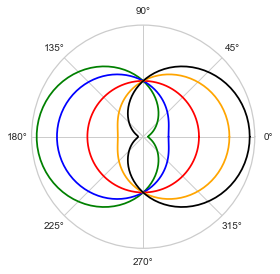

In [232]:
#f(x) = 1/2pi * (1 + a*cos(x))

x = np.linspace(0, 2*np.pi, 100)

# function evaluation
def fx(a):
    return 1/(2*np.pi) * (1 + a*np.cos(x))


colors = ["green", "blue", "red", "orange","black"]

# alpha values
alp = [-1/3,-1/5,0,1/5,1/3]

# plotting
for i in range(5):
    ax = plt.subplot(111, polar=True)
    ax.set_rticks([])
    ax.plot(x, fx(alp[i]), color=colors[i])
    

## 3) 
To find the method of moments estimator for α we find the first and second moment: 

$$ E(x) = \int_{0}^{2\pi} \frac{x}{2\pi} \ (1 + \alpha \cdot cos(x)) \ dx = \
\frac{1}{2\pi} \ \left(\int_{0}^{2\pi} \alpha x \ cos(x) \ dx \ + \ \int_{0}^{2\pi} x \ dx \right) = 
$$
$$ = \frac{1}{2\pi} \ \left( \alpha x sin(x) - \int_{0}^{2\pi} \alpha sin(x) \ dx + \frac{x^2}{2} \right) = \frac{1}{2\pi} \left( \alpha x sin(x) + \alpha cos(x) + \frac{x^2}{2} \right) \Big|_{0}^{2\pi} = \frac{2\alpha + 4\pi^2 - 2\alpha}{4\pi} = \pi \\ $$

The first moment is not useful, let's check the second one

$$
E(x^2) = \int_{0}^{2\pi} \frac{x^2}{2\pi} \ (1 + \alpha \cdot cos(x)) \ dx = \ \frac{\alpha x^2 sin(x)}{2\pi} - \frac{\alpha sin(x)}{\pi} + \frac{\alpha x cos(x)}{\pi} + \frac{x^3}{6\pi} \Big|_{0}^{2\pi} = \frac{6\alpha + 4\pi^2}{3} 
$$
$$
2\alpha + \frac{4\pi^2}{3} = \frac{1}{n} \sum_{i=1}^n X^2_i \quad \quad \hat{\alpha}_n = \frac{1}{2n} \sum_{i=1}^n X^2_i - \frac{2\pi^2}{3}
$$

## 4)

In [233]:
# Evaluation of the method-of-moments estimate for α using x20

# an array of 20 values
x20 = [1.7, 5.1, 2.5, 5.6, 6, 0.3, 3.3, 5.7, 3.5, 2.8, 6, 2.8, 4.4, 3.7, 0.6, 5.7, 1.4, 0.2, 1.9, 6]

# function for the summation estimation
def summ(xn):
    som = 0
    for el in xn:
        som += el**2
    return som

som = summ(x20)

# method of moments estimate for alpha
alpha = som/40 - 2*(math.pi**2)/3
print("The method-of-moments estimate for α using x_20 is alpha = " + str(alpha))

The method-of-moments estimate for α using x_20 is alpha = 1.3557637326070946


We are not satisfied with this result since we know that the range of alpha is $ \Big[-\frac{1}{3}, \ +\frac{1}{3}\Big] $, and our result is grater than the upper bound. 

## 5)
Implementation of the log-likelihood function $\ell(\alpha)$ for a generic set of n IID measurements 

$$ \ell(\alpha) = \sum_{i=1}^n log \ f(X_i | \alpha) = \sum_{i=1}^n log \ \left( \ \frac{1}{2\pi} \ (1+ \alpha \cdot cos(x)\right)
$$

Implementation of the log-likelihood function:

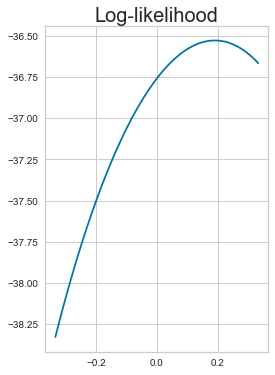

In [234]:
#let's set n to 200

xn = [1.7, 5.1, 2.5, 5.6, 6, 0.3, 3.3, 5.7, 3.5, 2.8, 6, 2.8, 4.4, 3.7, 0.6, 5.7, 1.4, 0.2, 1.9, 6]

# final used function
def f(alpha):
    summ = 0 
    for el in xn:
        summ += np.log((1/(2*np.pi)) * (1 + alpha*np.cos(el)))
    return summ

# plotting stuff
alpha = np.linspace(-1/3,1/3,200)

plt.title(label='Log-likelihood', 
          fontweight=10, 
          fontsize = 20,
          pad='2.0')

plt.rcParams['figure.figsize'] = [4, 6]
plt.plot(alpha,f(alpha))   
 

## 6)

To find the maximum likelihood estimator for alpha we used L-BFGS (Limited-memory  Broyden–Fletcher–Goldfarb–Shanno 
algorithm ), an iterative method for solving optimization problems. 
In this case we wanted to maximize the log-likelihood function without gradient information, and then solve
$$ \hat{\theta}_n =  \arg \max{\theta \in \Theta } \ \  \ell_n(\theta |X_n)$$
where $$ \ell_n(\theta |X_n) = log(\mathcal{L}(\theta |X_N))= \sum\limits_{i=1}^n log\ f(X_i | \theta)$$
Notice that when we computed the log-likelihood, we multiplied it by minus one, getting the opposite values of the actual function. We did this because the algorithm finds the value that, assigned to the variable, minimizes the function, meanwhile we wanted to find the point that maximized our function.


In [235]:
from scipy.optimize import minimize
from scipy.optimize import Bounds

xn = [1.7, 5.1, 2.5, 5.6, 6, 0.3, 3.3, 5.7, 3.5, 2.8, 6, 2.8, 4.4, 3.7, 0.6, 5.7, 1.4, 0.2, 1.9, 6]

#the obj function returns the opposite of the log likelihood function
def obj(alp): 
    summ = 0
    for el in xn: #xn is our small dataset     
        summ -= np.log(1/(2*np.pi) * (1 + alp*np.cos(el))) 
        # we compute the opposite of the log likelihood because the method we will apply minimizes the function given, 
        # whereas we want to find the value of alpha that maximizes the log-likelihood function
    return summ

r_min, r_max = -1/3, 1/3
pt = r_min + np.random.rand() * (r_max - r_min) #generates a random point (the initial point) between the interval of alpha

#this method uses L-BFGS algorithm to minimize the function given as parameter, in our case the oppoise of the log likelihood
result = minimize(obj, pt, method = "L-BFGS-B", bounds = [(-1/3,1/3)] ) 
#we need the bounds = [(-1/3,1/3)] because alpha is bounded by those values

print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])


solution = result['x'] #the solution is the value of alpha that maximizes the log likelihood
evaluation = obj(solution) #the evaluation is the log likelihood in the optimal alpha
print('Solution: f(%s) = %.5f' % (solution, -evaluation)) 
# we return the opposite of the evaluation because our function (obj) computes the opposite of the likelihood


Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 10
Solution: f([0.19073088]) = -36.52599


You can notice, also from the graph of the previous exercise (log-likelihood, exercise 2.5), how the log-likelihood function reaches its maximum in 0.2, assuming the value -36,52599.

Now we use the same method but introducing also the gradient information, it allows us to build a Jacobian matrix and to increase the efficiency of the maximization algorithm.
We have to compute the derivative of the log likelihood, that is

$$ \frac{\sigma \ell (\theta |X_n)}{\sigma \alpha} = \frac{cos(x)}{1 + \alpha cos(x)}$$

An additional reason why we decided to compute the log-likelihood instead of just the likelihood is that, by computing the derivative with respect to alpha, the variable alpha would disappear, and the derivative will be just a constant.


In [236]:
pt = r_min + np.random.rand() * (r_max - r_min) #generates the initial point in a range given by the bounds of alpha (-1/3,1/3)
#compute the derivative with respect to the variable alpha
def der(alp): 
    summ = 0
    for el in xn:
        summ += np.cos(el)/(1 + alp * np.cos(el))
    return -summ
#returns the negative of the summ for the reason written above

result = minimize(obj, pt, method = "L-BFGS-B", jac = der, bounds = [(-1/3,1/3)] )
# passing the derivative function (der) allows the method to compute the Jacobian and speed up the process, besides making it 
# more precise


print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

solution = result['x'] #the solution is the value of alpha that maximizes the log likelihood
evaluation = obj(solution) #the evaluation is the log likelihood in the optimal alpha
print('Solution: f(%s) = %.5f' % (solution, -evaluation))
# we return the opposite of the evaluation because our function (obj) computes the opposite of the likelihood


Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 5
Solution: f([0.19073099]) = -36.52599


Note that the total evaluations, when passing the derivative as a paramether, are clearly less (half for the majority of the cases) than the ones computed without using the derivative. This proves, empirically at least, that computing the Jacobian makes the BFGS algorithm faster.


In [237]:
# now we have to evaluate this from different points 
#we start by initializing an array of random numbers, we fix a seed to make this reproducible
n = 8
np.random.seed(2002)
points = r_min + np.random.rand(n) * (r_max - r_min)

res_wout_grad = []
res_w_grad = []
#for each random point we append the MLE optimization with L-BFGS (with and without gradient information)
# computed using that specific point as initial point
for i in range(n):
  res_wout_grad.append(minimize(obj, points[i], method = "L-BFGS-B", bounds = [(-1/3,1/3)] ))
  res_w_grad.append(minimize(obj, points[i], method = "L-BFGS-B", jac = der, bounds = [(-1/3,1/3)] ))

In [238]:
print("Results without gradient") # here we print the results of those without the gradient
for i in range(len(res_wout_grad)): # we iterate through the results and we print them as we saw in class
    print('Status : %s' % res_wout_grad[i]['message'])
    print('Total Evaluations: %d' % res_wout_grad[i]['nfev'])

    solution = res_wout_grad[i]['x'] 
    evaluation = obj(solution) 
    print('Solution: f(%s) = %.5f' % (solution, -evaluation))

Results without gradient
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 10
Solution: f([0.19073068]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 12
Solution: f([0.19073082]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 12
Solution: f([0.19073073]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 12
Solution: f([0.19073073]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 10
Solution: f([0.19073068]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 10
Solution: f([0.19073095]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 10
Solution: f([0.1907307]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 10
Solution: f([0.19073093]) = -36.52599


In [239]:
print("Results with gradient") #here we print those with the gradient
for i in range(len(res_w_grad)): # same as above (but with the gradient)
    print('Status : %s' % res_w_grad[i]['message'])
    print('Total Evaluations: %d' % res_w_grad[i]['nfev'])

    solution = res_w_grad[i]['x'] #the solution is the value of alpha that maximizes the log likelihood
    evaluation = obj(solution) #the evaluation is the log likelihood in the optimal alpha
    print('Solution: f(%s) = %.5f' % (solution, -evaluation))

Results with gradient
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 5
Solution: f([0.19073076]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 6
Solution: f([0.19073076]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 6
Solution: f([0.19073076]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 6
Solution: f([0.19073076]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 5
Solution: f([0.19073076]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 5
Solution: f([0.190731]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 5
Solution: f([0.19073076]) = -36.52599
Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 5
Solution: f([0.19073084]) = -36.52599


We generated 8 random starting points, from the results we can observe that the evaluation of the solution is always the same, as we expected, it is the maximum of the function plotted in the previous point. We can actually notice that even though the evaluation is always the same, the solutions are slightly different every time.

As we highlighted above the solution is twice as fast using gradient information, the number of evaluations changes slightly depending on the initial point and ranges mainly from 10 to 12 (without gradient info) and from 5 to 6 with gradient info.
We actually found a smaller number in one of our first tries but it never happened again.

We can't actually compare this results with the method of moments because our method of moments is far out of the bounds. As you will see in the next point we have a clear lack of fit with MoM buuuuut no spoilers, let's go on!

## 7)

We now graphically compare the raw data with the fitted models (see the figure below). In the figure we are showing three main elements, that are: the histogram representing the raw data, a line computed with respect to an alpha optimizied using MLE (the orange one) and a line computed with respect to an alpha optimized using the Method of Moments.

Unfortunately, computing the method of moments we expected a value of alpha bounded by -1/3 and 1/3, but we get a value that is greater than 1/3. 

We clearly have an evidence of lack of fit with respect to the MoM fitted model, this obviously isn't what we initially expected but since alpha is out of bounds we actually saw this coming :(

Regarding the MLE fitted model it obviously isn't perfect, still it somehow approximates the behaviour of the raw data (with some exceptions). We actually expected something slightly better given the examples seen in class, but we don't consider it a failure (this one at least).

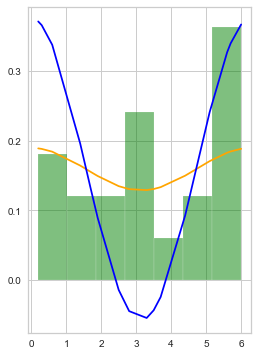

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline

xn = [1.7, 5.1, 2.5, 5.6, 6, 0.3, 3.3, 5.7, 3.5, 2.8, 6, 2.8, 4.4, 3.7, 0.6, 5.7, 1.4, 0.2, 1.9, 6] #our small dataset
alpha = 0.19073071 #the value of alpha optimizied 

data = np.array(xn) #convert a list into a np array
#we plot the histogram
#the histogram method returns, in order, the values of the bins, where the edges of the bins are
bin_values, bin_edges, patches = plt.hist(data, density=1, bins = 7, facecolor='green', edgecolor = 'white', alpha=0.5)
def fxy(x, a):
    return 1/(2*np.pi)*(1+a*np.cos(x)) 
#the function f returns the values depending on the variable x, computed using alpha optimal where alpha is 0.19073071

s_xn = list(sorted(xn)) # we sort xn because we want to pass it as input  to the fxy function
y=fxy(s_xn,alpha) #we compute the y of the orange line using the alpha optimized using MLE
plt.plot(s_xn,y, color="orange") # we plot the orange line ono the histogram
y=fxy(s_xn, 1.3557637326070955)
#here we compute the values to plot on the y axis passing to the fxy method the value of alpha optimized using 
# the method of moments. 
plt.plot(s_xn,y, color = "blue")
plt.show()

## Exercise 3: Groupify!
## 1)
We picked the automaker Toyota, since it had a cospicuous amount of models, and their models differ in cars' lineup.

In [241]:
import pandas as pd
import matplotlib.pyplot as plt

# Here you can visualize only the Toyota cars with their characteristics
df = pd.read_csv("cars2021.csv")
df = df[df.make == "Toyota"]
df

,make,model,displacement,number_cyl,number_gears,city_mpg,hwy_mpg
66,Toyota,LC 500 CONVERTIBLE,5.0,8,10,15,25
132,Toyota,LC 500,5.0,8,10,16,25
133,Toyota,LC 500h,3.5,6,10,26,34
134,Toyota,RC 300,2.0,4,8,21,31
135,Toyota,RC 300 AWD,3.5,6,6,19,26
...,...,...,...,...,...,...,...
809,Toyota,4RUNNER 4WD,4.0,6,5,16,19
810,Toyota,HIGHLANDER HYBRID AWD,2.5,4,6,35,35
811,Toyota,HIGHLANDER HYBRID AWD LTD/PLAT,2.5,4,6,35,34
812,Toyota,LAND CRUISER WAGON 4WD,5.7,8,8,13,17


## 2)
We decided to base our anlysis on the displacement and the miles per gallon traversed in the highway. The reason why we picked these two variables is that we think that the main characteristics of a lineup of cars are the displacement and the gas consumption. We picked the highway value instead of the city one because we wanted to consider the full capability of the gas tank. 

## 3)

In [242]:
#let's check if there are null/na values 
print(sum(df.displacement.isna()))
print(sum(df.hwy_mpg.isna()))
print(sum(df.city_mpg.isna()))
print(sum(df.number_cyl.isna()))
print(sum(df.number_gears.isna()))
# as we can see no attribute has missing values so we don't have to worry about this neither for this 
# part where we use two variables nor for the bonus part where we are going to use all 5

0
0
0
0
0


<AxesSubplot:title={'center':'Displacements'}>

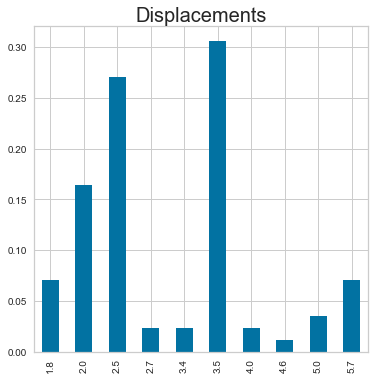

In [243]:
# This plot represents the displacements 
fig = plt.figure()
fig.set_figwidth(6)
# displaying the title
plt.title(label='Displacements', 
          fontweight=10, 
          fontsize = 20,
          pad='2.0')

# plotting
obs_freq = df.displacement.value_counts(normalize=True).sort_index()
obs_freq.plot(kind='bar', label = "Obs Freq.")

<AxesSubplot:title={'center':'Highway-MPG'}>

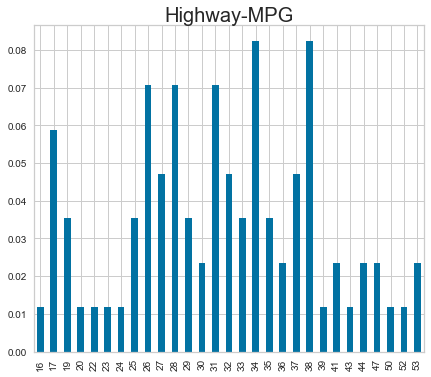

In [244]:
# This plot represents the miles per gallon done in a highway
fig = plt.figure()
fig.set_figwidth(7)
plt.title(label='Highway-MPG', 
          fontweight=15, 
          fontsize = 20,
          pad='2.0')

obs_freq = df.hwy_mpg.value_counts(normalize=True).sort_index()
obs_freq.plot(kind='bar', label = "Obs Freq.")


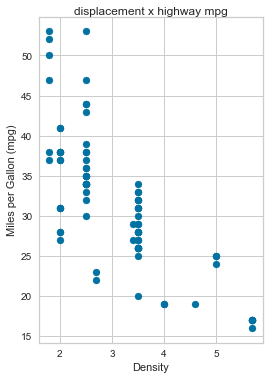

In [246]:
# Plot of displacement and highway mpg

plt.title(label='displacement x highway mpg', 
          fontweight=10, 
          pad='2.0')
plt.ylabel('Miles per Gallon (mpg)')
plt.xlabel('Density')
plt.scatter(df.displacement, df.hwy_mpg)
mean_d = df.displacement.mean()
mean_h = df.hwy_mpg.mean()
med_d = df.displacement.median()
med_h = df.hwy_mpg.median()
mod_d = df.displacement.mode()
mod_h = df.hwy_mpg.mode()
std_d = df.displacement.std()
std_h = df.hwy_mpg.std()
var_d = df.displacement.var()
var_h = df.hwy_mpg.var()
corr = df.displacement.corr(df.hwy_mpg)
cov = df.displacement.cov(df.hwy_mpg)


The mean of a data set is the average of all its values, the mean of the displacement is 3.07, while the mean of the highway mpg is 31.73. Of course these two values are different since the range of values is different in the two distributions. 

The median is the midpoint of a distribution, unlike the mean is more resistent to outliers. For our data the medians are 2.5 for the displacement and 31 for the highway mpg.

The mode is the value that occurs most often in a data set. For the displacement the mode is 3.5 while we have two different modes for the highway mpg: 34 and 38. 
 
We can note that in both distributions we have the mean greater than the median, this means that our distributions are positively skewed.

To observe how the data is spread across the distribution, we can find the  variance and the standard deviation, that measures the average distance of the observations from their mean. The variance of the displacement is 1.13 and the standard deviation is 1.06, while for the highway mpg the variance is 71.29 and the standard deviation is 8.44.

To measure the relationship between our variables we use the covariance and the correlation. The covariance expresses how much the variables change together, our result for the covariance is -6.85, since it's negative, it reveals that the two variables tend to move in inverse directions. The Pearson's correlation coefficient is -0.76, it expresses the relationship between the two random variables, in this case the linear relationship is quite strong and it's negative, it means that the two variables move in opposite directions, when one increases the other one decreases. 

From our analysis we can deduce that there's a pretty strong anti-correlation between displacement and highway mpg, for this reason we are confident that our results, using these two variables, will represent the different lineup of cars.

## 4)

In [247]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn import mixture
from sklearn.model_selection import train_test_split
df = df[["displacement","hwy_mpg"]]
# we use sklearn library to create a 70%-30% sample-splitting scheme and we assign a random state to make it reproducible
df_tr, df_te = train_test_split(df, test_size = 0.30, random_state = 11)

# Here we use scikit to fit 
# This is a crucial step since here we find our models and the parameter estimates

n_components = np.arange(1, 10)
models = [mixture.GaussianMixture(n_components = n, covariance_type='full', random_state= 17).fit(df_tr)
          for n in n_components]


Now we actually get to the real deal, in the next cell we have implemented the following:
$$
\hat{cv}_j = - \frac{1}{n} log \prod_{i=1}^{n} \sum_{r=1}^{j} \hat{\pi}_r \mathcal{N}(X^*_i|\hat{\theta}_j)
$$

This function implements the MoG-log-likelihood that we will use to evaluate the test data given the parameters found in the previous cell.

In [248]:
#So here we are

#The function takes as parameters the models' list and the dataframe
# def cv(models, df_te):
    
#     ret  = [] # we initialize an empty list in which we will append the cv of each model

#     for i in range(len(models)): # iterate through the models
#         prod = 1 #initialize the product 
#         for index, row in df_te.iterrows(): #  iterate through the rows of the test set
#             xi = [row["displacement"], row["hwy_mpg"]] # create a vector of the parameters of our choice
#             s = 0 # initialize the sum
#             for j in range(i+1): # iterate through the number of components 
#                 # now we get the parameter estimates from the fitting 
#                 mu_vec = models[i].means_[j] # mean
#                 S_mat = models[i].covariances_[j] # covariance matrix
#                 pi = models[i].weights_[j] # proportion
                
#                 s += (pi * multivariate_normal.pdf(xi, mu_vec, S_mat)) # we sum this up
#             # at the end of the for loop we multiply 
#             prod *= s
#         # here we finished for that model so we can add the result to the list
#         ret.append(-1/len(df_te) * np.log(prod))
    
#     return ret
# I commented this out since it was less precise, we kept it since it was the first implementation we came up with
# And we couldn't kill it. We used logarithms properties of the product to implement the one below
def cv(models, df_te):
    #The function takes as parameters the models' list and the dataframe
    ret  = []
    # we initialize an empty list in which we will append the cv of each model
    for i in range(len(models)):# iterate through the models
    
        ext_sum = 0 #initialize the external sum
        for index, row in df_te.iterrows():  #  iterate through the rows of the test set
            xi = [row["displacement"], row["hwy_mpg"]]
            s = 0  # initialize the sum
            for j in range(i+1): #iterate through the number of components 
                #now we get the parameter estimates from the fitting 
                mu_vec = models[i].means_[j] # mean
                S_mat = models[i].covariances_[j] # covariance 
                pi = models[i].weights_[j] # proportion
                s += (pi * multivariate_normal.pdf(xi, mu_vec, S_mat)) # we sum this up
            ext_sum += np.log(s)  # at the end of the for loop we sum the logarithm
            # here we finished for that model so we can add the result to the list
        ret.append(-1/len(df_te) * ext_sum)
    
    return ret

# to get an idea on how our function was performing we compared it with the results of the 
# sklearn.mixture.GaussianMixture.score method

cross_val = cv(models,df_te)
score_results = [-m.score(df_te) for m in models]

print(cross_val)
print(score_results)

[4.951331238257387, 4.631352123531141, 2.557598114901593, 4.576371538702139, 4.731176678144637, 5.048334575875446, 10.303300983469557, 7.758566278392028, 23.05436557558512]
[4.951331238257388, 4.631352123531141, 2.557598114901592, 4.576371538702139, 4.731176678144638, 5.048334575875446, 10.303300983469557, 7.758566278392033, 23.05436557558513]


In [249]:
#not so bad right? B)

# so here we evaluate the Akaike Information Criterion for each model
aic_list = [m.aic(df) for m in models]

number_cluster_aic = aic_list.index(min(aic_list))+1 #this pretty ugly stuff gives us the lowest result for both
number_cluster_cv = cross_val.index(min(cross_val))+1


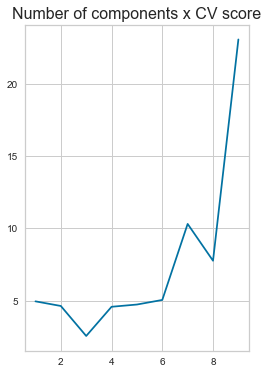

In [250]:
plt.title("Number of components x CV score",fontsize = 16)
plt.plot(n_components, cv(models,df_te), label='Cross validation')

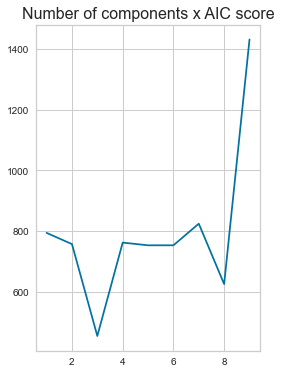

In [251]:
plt.title("Number of components x AIC score",fontsize = 16)
plt.plot(n_components,[m.aic(df) for m in models],label="AIC")

In [252]:
# Not much to say on this one :)
# The credits of this cell go to Pierpaolo Brutti

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40)
    # ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

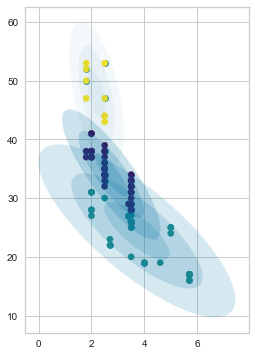

In [253]:
#plot with the cv optimal
#show_cv(number_cluster_cv, tdf_tr,tdf_te)
#da commentare forse
from matplotlib.patches import Ellipse
model_cv = models[number_cluster_cv -1]
# mixture.GaussianMixture(n_components = number_cluster_cv , covariance_type='full').fit(df4_tr)
lebll_cv = model_cv.fit_predict(df_te)

plt.scatter(df_te.displacement, df_te.hwy_mpg, s=40, cmap='viridis')
plot_gmm(model_cv, df.to_numpy())

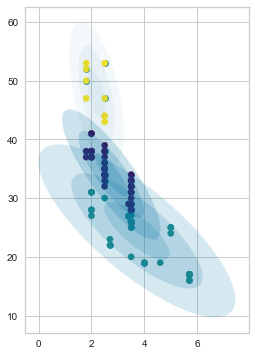

In [254]:
#plot with the aic optimal
model_aic = models[number_cluster_aic-1]
#mixture.GaussianMixture(n_components = number_cluster_aic , covariance_type='full').fit(df4_tr)
lebll_aic = model_aic.fit_predict(df_te)

plt.scatter(df_te.displacement, df_te.hwy_mpg, s=40, cmap='viridis')
plot_gmm(model_aic, df.to_numpy())

In this first example using that particular combination of random_states we got the same number of cluster as a result. 
So in this case the agreement is pretty clear since the clusterizations are the same and the number of components is the same.
Furthermore, observing the two line graphs above, we can actually see a pretty good match between the two graphs: there are obviously some differences but the graphs have a quite similar behaviour.
To conclude the analysis we thought it might be better to analyse another combination of random states in which the two methods yield a different optimal cluster number.

In [255]:
dfa = pd.read_csv("cars2021.csv")
dfa = dfa[dfa.make == "Toyota"]
dfa = dfa[["displacement","hwy_mpg"]]
dfa_tr, dfa_te = train_test_split(dfa, test_size = 0.30, random_state = 36)
# Here we use scikit to fit 
# This is a crucial step since here we find our models and the parameter estimates
#[(0, 19),     (0, 28)
# (4, 7), (33, 9), (36, 25), (36, 42), (44, 6), (47, 29)]
n_components = np.arange(1, 10)
models2 = [mixture.GaussianMixture(n_components = n, covariance_type='full', random_state= 25).fit(dfa_tr)
          for n in n_components]

cross_val2 = cv(models2,dfa_te)
aic_list2 = [m.aic(dfa) for m in models2]

number_cluster_aic2 = aic_list2.index(min(aic_list2))+1 #this pretty ugly stuff gives us the lowest result for both
number_cluster_cv2 = cross_val2.index(min(cross_val2))+1
print(number_cluster_aic2)
print(number_cluster_cv2)

3
4


[4.882088285517152, 4.654110187109242, 4.003208017711086, 3.9584942560511975, 7.166436847882159, 7.813680049113121, 8.074596683852379, 45.80336435061573, 46.12312621993733]


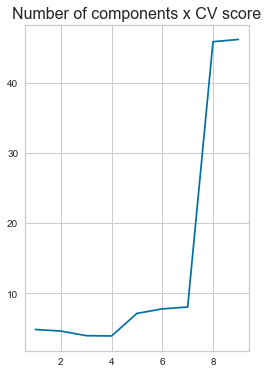

In [256]:
plt.plot(n_components, cv(models2,dfa_te), label='Cross validation') #second example
plt.title("Number of components x CV score", fontsize = 16)
print(cv(models2,dfa_te))

[792.0751966865296, 755.9596677655871, 465.7134756550048, 468.09051969472705, 871.1567786531273, 881.5221825526228, 876.9105717216565, 2373.8245302251553, 2393.7040463252342]


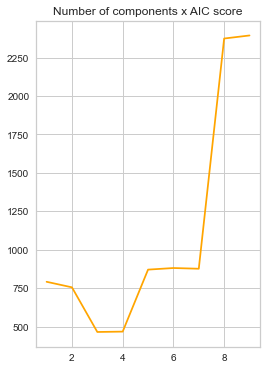

In [257]:
plt.plot(n_components,[m2.aic(dfa) for m2 in models2],label="AIC", color = 'orange') #second example
plt.title("Number of components x AIC score")
print([m2.aic(dfa) for m2 in models2])

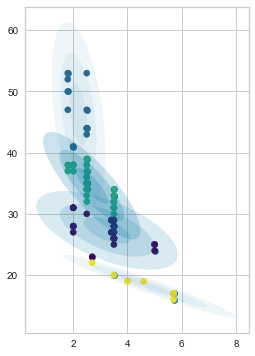

In [258]:
#plot with the optimal from cv
#show_cv(number_cluster_cv, tdf_tr,tdf_te)

model_cv2 = models2[number_cluster_cv2 -1]
#mixture.GaussianMixture(n_components = number_cluster_cv , covariance_type='full').fit(df4_tr)
lebll_c2 = model_cv2.fit_predict(dfa_te)

plt.scatter(dfa_te.displacement, dfa_te.hwy_mpg, s=40, cmap='viridis')
plot_gmm(model_cv2, dfa.to_numpy())

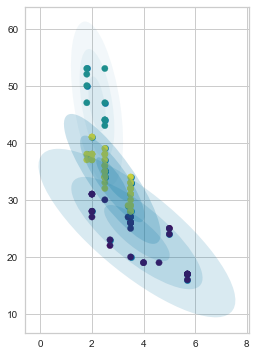

In [259]:
#plot with the aic optimal
model_aic2 = models2[number_cluster_aic2-1]
#mixture.GaussianMixture(n_components = number_cluster_aic , covariance_type='full').fit(df4_tr)
lebll_aic2 = model_aic2.fit_predict(dfa_te)

plt.scatter(dfa_te.displacement, dfa_te.hwy_mpg, s=40, cmap='viridis')
plot_gmm(model_aic2, df.to_numpy())

Analysing this last example, 
starting from the graph we can see that they are actually quite similar but the optimal number of cluster is different i.e. (4 for cv and 3 for aic).

Looking at the clusters of the two models we can see that two clusters are really similar except for a couple of points (the greenish one in the aic model and the blue one in the cv model).

There are also two other clusters which have lots of points in common: they are the middle ones (yellow-aic and greenish cv).
The rest of the points form the single last cluster in the aic model and it's split in two clusters in the cv model.

By looking at the graphs, we can notice that the AIC model is more compact than the Cross validation one, therefore we can judge the AIC one as the best one, for compactness (AIC clusters are more centralized), stability (there are less points on the borders of clusters) and higher density (shown by the darker blue tones) reasons.

Based on this (slightly confused) explanation we can conclude that there are many different similarities, from the graph to the clusters, where, even if the number of clusters is different, $\frac{2}{3}$ of the clusters of the aic model are actually pretty similar to two clusters of the cv model.

We consider ourselves quite happy with this result and with this exercise in general (which was actually pretty fun).

## 5)

We now want to repeat the analysis using k-mean, to compare the result with the ones obtained in the previous exercise, using AIC and MoG.
We plot a graph that shows the optimal number of clusters, in this case equal to three, as a result of the elbow method.

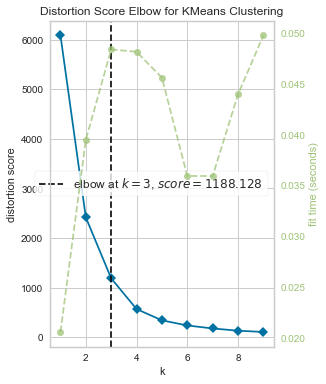

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [260]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

df = pd.read_csv("cars2021.csv") 
df = df[df.make == "Toyota"]
df = df[["displacement","hwy_mpg"]]
#select from the data frame the data of interest

n_components = np.arange(1, 10)
distortions = []
#we now fit the model using kmeans, trying different numbers of cluster
for i in n_components: 
    # selecting a random_state number we allow the reproducibility of the model
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) 
    kmeans.fit(df) 
    distortions.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df)        
visualizer.show()

The data is represented in the figure below, where points of the same colour belong to the same cluster (having selected the optimal number of cluster, that in this case is 3) and the triangles represent the centroids, indeed there is one for each cluster.

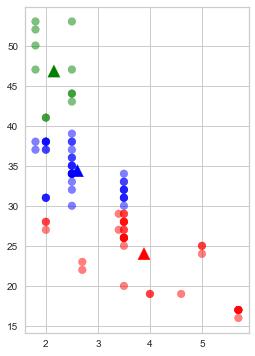

In [261]:
from sklearn import mixture
import numpy as np
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

df = df[["displacement","hwy_mpg"]]
# selecting a random_state number we allow the reproducibility of the model
k_optimal = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_optimal.fit(df)
#fit the model using kmeans, evaluated using the optimal number of clusters
df['cluster'] = k_optimal.fit_predict(df)
#we use the cluster_centers_ to find the centroids of the clusters, repsentented as triangles in the figure
centroids = k_optimal.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['red', 'green', 'blue']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(df.displacement, df.hwy_mpg, c=df.c, alpha = 0.5, s=60)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=150)

We now show the same data as before and represent the cluster as ellipses of different colors, the triangles are the centroids.

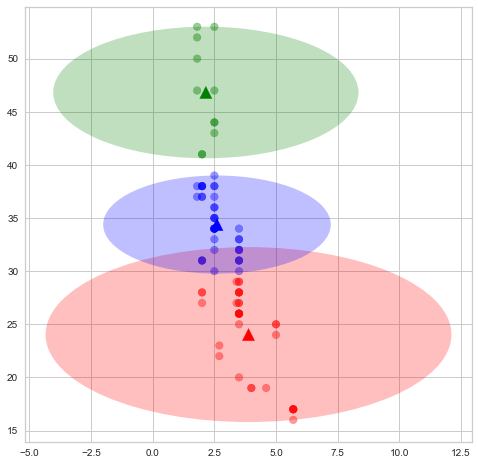

In [262]:
from sklearn import mixture
import numpy as np
from matplotlib.lines import Line2D
from scipy import interpolate
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist

fig, ax = plt.subplots(1, figsize=(8,8))
df_new = df[['displacement', 'hwy_mpg']]

k_optimal = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_optimal.fit(df_new)
#fit the model using the optimal number of clusters, obtained thannks to elbow method
labels_ex5 = k_optimal.fit_predict(df_new)
#use the model to predict the labels 

#compute the centroids of the cluster using the cluster_centers_ method
centroids = k_optimal.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['red', 'green', 'blue']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(df.displacement, df.hwy_mpg, c=df.c, alpha = 0.4, s=60)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=150)
#we compute the radius of the three clusters to plot the ellipses
radii = [cdist(df_new[labels_ex5 == i], [center]).max()
             for i, center in enumerate(centroids)]
col = 0
for c, r in zip(centroids, radii):

    ax.add_patch(plt.Circle(c, r, fc = colors[col], lw=3, alpha=0.25, zorder=1))
    col += 1

Comparing the solution obtained using kmeans and elbow method (which gives as optimal number of cluster 3) to the solutions obtained applying ACI and our implementation of cross validation, we can notice that the three results are consistent with respect to each other. In some cases they return as optimal the same number of clusters (as you can see in the first example from the exercise 3 point 4), in others we have small differences: in the second example that we have seen in exercise 3 point 4 we have two line graphs, one using AIC and the other one using cv. The AIC one states that the optimal number of cluster is 3, like our elbow method, whereas the cv one expresses something a bit different, that the clusters have to be 4.

## 6)


The function in the following cell (cv_ex6) implements an algorithm which is really similar to the first cv implemented.
The only difference is that in the first cv we implemented the following formula 
$$
\hat{cv}_j = - \frac{1}{n} log \prod_{i=1}^{n} \sum_{r=1}^{j} \hat{\pi}_r \mathcal{N}( X^*_i| \hat{\theta}_j )
$$ 
The problem with this approach was that for big scores the function returned
$\infty $ (actually really low scores since they are negative to begin with). But still we had this really tricky approximation error where basically the logarithm approximated to $-\infty $ a value that was too close to zero. Our initial attempt to fixing this was by applying the properties of the logarithms obtaining the following formula 
$$
\hat{cv}_j = - \frac{1}{n}  \sum_{i=1}^{n} log \sum_{r=1}^{j} \hat{\pi}_r \mathcal{N}(X^*_i| \hat{\theta}_j )
$$ 
This actually increased significantly the maximum score obtainable (more than doubled) but this was still pretty far off from the precision that scikitlearn was capable of delivering.
We tried to make sense of their implementation but we stumbled upon two abstract methods and so our thirst of knowledge (and precision) wasn't satisfied. Inspired by sklearn's library we tried to implement a log of sum of exponentials but we didn't gain any precision. 
Our function reached a precision of roughly $e^{-179}$. We are open to solutions to this really tricky problem. 
But enough with this, let's get back to the code!

In [263]:
from scipy.special import logsumexp
def cv_ex6(models, df_te):
    #The function takes as parameters the models' list and the dataframe
    ret  = []
    # we initialize an empty list in which we will append the cv of each model
    for i in range(len(models)):# iterate through the models
    
        ext_sum = 0 #initialize the external sum
        #ext_sum1 = 0
        for index, row in df_te.iterrows():  #  iterate through the rows of the test set
            xi = [row["displacement"], row["number_cyl"], row["number_gears"],  row["city_mpg"], row["hwy_mpg"]] # create a vector of the parameters of our choice
            #s1 = []  # initialize the sum
            s = 0
            for j in range(i+1): #iterate through the number of components 
                #now we get the parameter estimates from the fitting 
                mu_vec = models[i].means_[j] # mean
                S_mat = models[i].covariances_[j] # covariance 
                pi = models[i].weights_[j] # proportion
                #s1.append(pi * multivariate_normal.pdf(xi, mu_vec, S_mat)) # we sum this up
                s += (pi * multivariate_normal.pdf(xi, mu_vec, S_mat))
            
            #maxi = max(s1)
            #s1 = [np.exp(val - maxi) for val in s1]
            # log ( sum(s1)) == lse(log) questa continua a non fungere
            #logs = [np.log(el) for el in s1]
            
            #lse x1,x2,x3 = max + log(exp(xn -max)) for n in range s
        
            #ext_sum1 += logsumexp(s1)  # at the end of the for loop we sum the logarithm
            ext_sum += np.log1p(s)
            
            # here we finished for that model so we can add the result to the list
        ret.append(-1/len(df_te) * ext_sum)
    
    return ret

#As you can see we tried to implement the logsumexp to avoid approximation errors but still...
# The formula log (sum(s1)) == lse(log) wasn't still precise enough but we couldnt turn it into lse(sum(s1)) = x* + log(exp(x1 - x*) + ...  exp(xn - x*))
# We hope this is something... I'll get around this sooner or later


In [264]:
df_ex6 = pd.read_csv("cars2021.csv")
df_ex6 = df_ex6[df_ex6.make == "Toyota"]
df_ex6 = df_ex6[["displacement","number_cyl","number_gears","city_mpg","hwy_mpg"]]
from scipy.stats import multivariate_normal

#we use sklearn library to split the library and we assign a random state to make it reproducible
df_tr_ex6, df_te_ex6 = train_test_split(df_ex6, test_size = 0.30, random_state = 4)
# Here we use scikit to fit 
# This is a crucial step since here we find our models and the parameter estimates
n_components_ex6 = np.arange(1, 10)
models_ex6 = [mixture.GaussianMixture(n_components = n, covariance_type='full', random_state = 4).fit(df_tr_ex6)
          for n in n_components_ex6]
# so here we evaluate the Akaike Information Criterion for each model
aic_list_ex6 = [m.aic(df_te_ex6) for m in models_ex6]
number_cluster_aic_ex6 = aic_list_ex6.index(min(aic_list_ex6))+1
cross_val_ex6 = cv_ex6(models_ex6,df_te_ex6)
number_cluster_cv_ex6 = cross_val_ex6.index(min(cross_val_ex6))+1

/var/folders/ly/6dckx2gj5sl9kyny3x0tqstm0000gn/T/ipykernel_15179/2160094273.py:30: RuntimeWarning:

divide by zero encountered in log



/var/folders/ly/6dckx2gj5sl9kyny3x0tqstm0000gn/T/ipykernel_15179/2160094273.py:30: RuntimeWarning:

divide by zero encountered in log



[9.777620954676575, 5.546757935305879, 6.481803517428135, 2.1718226758586865, 22.746884031585473, 32.46519362485336, 37.92600210181706, inf, inf]
[-9.777620954676577, -5.546757935281879, -6.4818035166431365, -2.1718226743408042, -22.74688403248642, -32.46519362497405, -37.92600210174946, -152.91926822668617, -152.97055920749457]


/var/folders/ly/6dckx2gj5sl9kyny3x0tqstm0000gn/T/ipykernel_15179/2160094273.py:30: RuntimeWarning:

divide by zero encountered in log



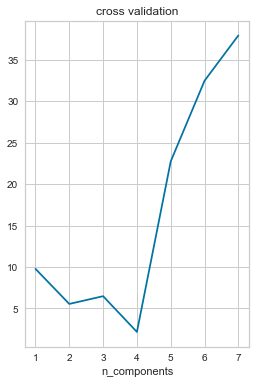

In [265]:
plt.xlabel('n_components')
plt.title("cross validation")
plt.plot(n_components_ex6, cv_ex6(models_ex6,df_te_ex6), label='Cross validation')
print(cv_ex6(models_ex6,df_te_ex6))
print([m.score(df_te_ex6) for m in models_ex6]) # actually since we had some approximation issues as seen above
# the graph plotting score is more accurate but we were proud of what we did so we sticked to our methods :)


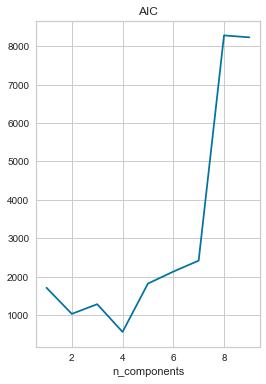

In [266]:
plt.xlabel('n_components')
plt.title("AIC")
plt.plot(n_components_ex6, [m.aic(df_ex6) for m in models_ex6], label='AIC')

Here we wanted to show a way to visualize multiple dimensional data, the first using the cross validation evaluation, and the second with the AIC evaluation, that in this case return the same optimal number of clusters.

In [267]:
import plotly.express as px
#number_cluster_cv_ex6 is the optimal number of cluster and we take the model indexing in the list of models already fitted using MoG 
model_cv_ex6 = models_ex6[number_cluster_cv_ex6-1] 
#model_cv_ex6 is the optimal number
lebll_cv_ex6 = model_cv_ex6.fit_predict(df_te_ex6)
fig_cv_ex6 = px.scatter_matrix(df_te_ex6, dimensions=["displacement","number_cyl","number_gears","city_mpg","hwy_mpg"],color="displacement")
fig_cv_ex6.update_layout(
                    height=750,
)
fig_cv_ex6.show()

In [268]:
model_aic_ex6 = models_ex6[number_cluster_aic_ex6-1]
lebll_aic_ex6 = model_aic_ex6.fit_predict(df_te_ex6)
fig_aic_ex6 = px.scatter_matrix(df_te_ex6, dimensions=["displacement","number_cyl","number_gears","city_mpg","hwy_mpg"],color="displacement")
fig_aic_ex6.update_layout(
                    height=750,
)
fig_aic_ex6.show()